# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 2: To Bike or Not to Bike...

## Overview
Welcome to Project 2! This goal of this project is to take the EDA work you did in Project 1 and build the best linear regression model using the features you were given and any you have derived from them. 

In this project, you will practice and demonstrate the following skills:
- EDA (just a tad!)
- Feature Engineering
- Single Linear Regression
- Multiple Linear Regression
- Linear Regression Evaluation Metrics


## Getting Ready for Modelling

#### 1. Import Data from Project 1

In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import datetime
from datetime import date, datetime
%matplotlib inline

In [269]:
import datetime as dt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import os
os.getcwd()

'/Users/annamitchell/Desktop/GA_Docs/Projects/project-2'

In [125]:
bike = pd.read_csv('/Users/annamitchell/Desktop/GA_Docs/bike_data2.csv')

In [130]:
#encode the categorial variables 

label_encoder = LabelEncoder()
bike.iloc[:,0] = label_encoder.fit_transform(bike.iloc[:,0]).astype('float64')

In [131]:
bike.head(1)

,hour,date,holiday,weathersit,temp,hum,windspeed,count,season,registered,casual,weekday,month,day_name,year,month_year
0,0.0,2011-01-01,0,1,0.24,0.81,0.0,16,Winter,13,3,5,1,Saturday,2011,2011-01


#### 2. Create Data Dictionary

Write a data dictionary in a markdown table below. For variables that were found in the original dataset for Project 1, you can use the description that came with the dataset.

|Variable|Units|Definition|
|---|---|---|
| | | |
| | | |

In [12]:
my_dict = {
     'instant': 'record index', 
     'dteday': 'date', 
     'holiday': 'is a holiday or not',
     'temp': 'normalized temp in celsius',
     'atemp' :'normalized feeling temp in celsius',
     'hum' : 'normalized humidity',
     'windspeed': 'normalized wind speed',
     'count': 'count of total rental bikes including casual and registered',
     'registered': 'count of registered users',
     'casual':'count of casual users',
     'weekday': 'whether the day falls during the week',
     'month': 'month of instant',
     'quarter': 'quarter of instant',
     'day_name' : 'day of the week',
     'season': {
         '1: winter',
         '2: spring',
         '3: summer',
         '4: fall'
          
     },
     'weathersit': {
         '1: Clear, few clouds, partly cloudy',
         '2: Mist plus clouds, mist plus broken clouds, few clouds, mist',
         '3: Light Snow, light rain + thunderstorms + scattered clouds, light rain',
         '4: Heavy Rain, Ice Pallets, thunderstorm, mist, snow, fog'}
    
}        
        

#### 3. Short EDA

##### 3.A Check for Multicollinearity
Using your choice of data visualization, explore the relationship between all of the feature variables to check for multicollinearity.

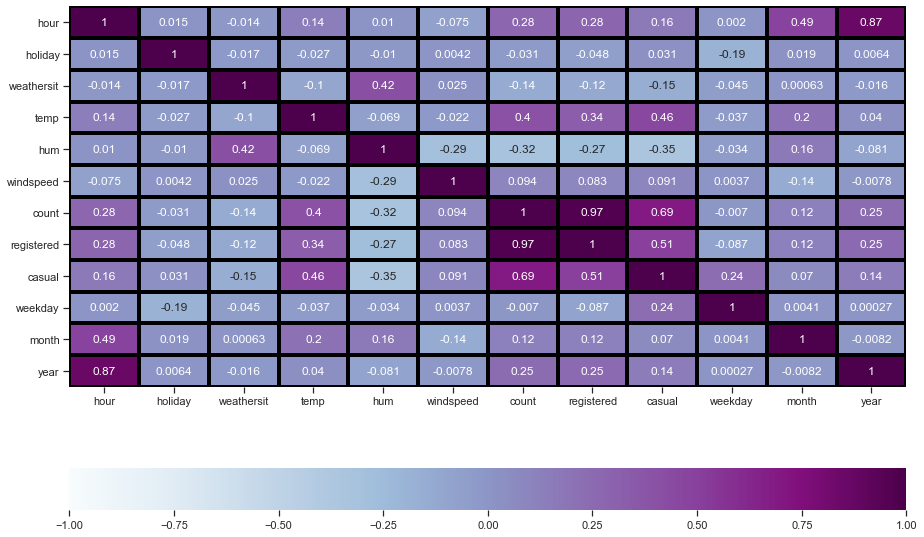

In [132]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
corr = bike.corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
                  yticklabels = corr.columns, 
                  annot=True, 
                  cmap="BuPu",
                  vmin=-1, vmax=1, center= 0, 
                  linewidths=3, linecolor='black', 
                  cbar_kws= {'orientation': 'horizontal'});

- As we can see both the feature 'temp' and 'atemp' have similar distribution and may present redundancy and even multicollinearity. To keep things clean we can drop the 'atemp' feature

In [127]:
bike.drop('atemp', axis=1, inplace=True)

In [128]:
#dropping "quarter", will not need 
bike.drop('quarter', axis=1, inplace=True)

In [18]:
#bike.drop('hum', axis=1, inplace=True)

##### 3.B Relationship Between Features and Target Variable
Using your choice of data visualization, explore the relationship between each of your feature variables and your target variable.

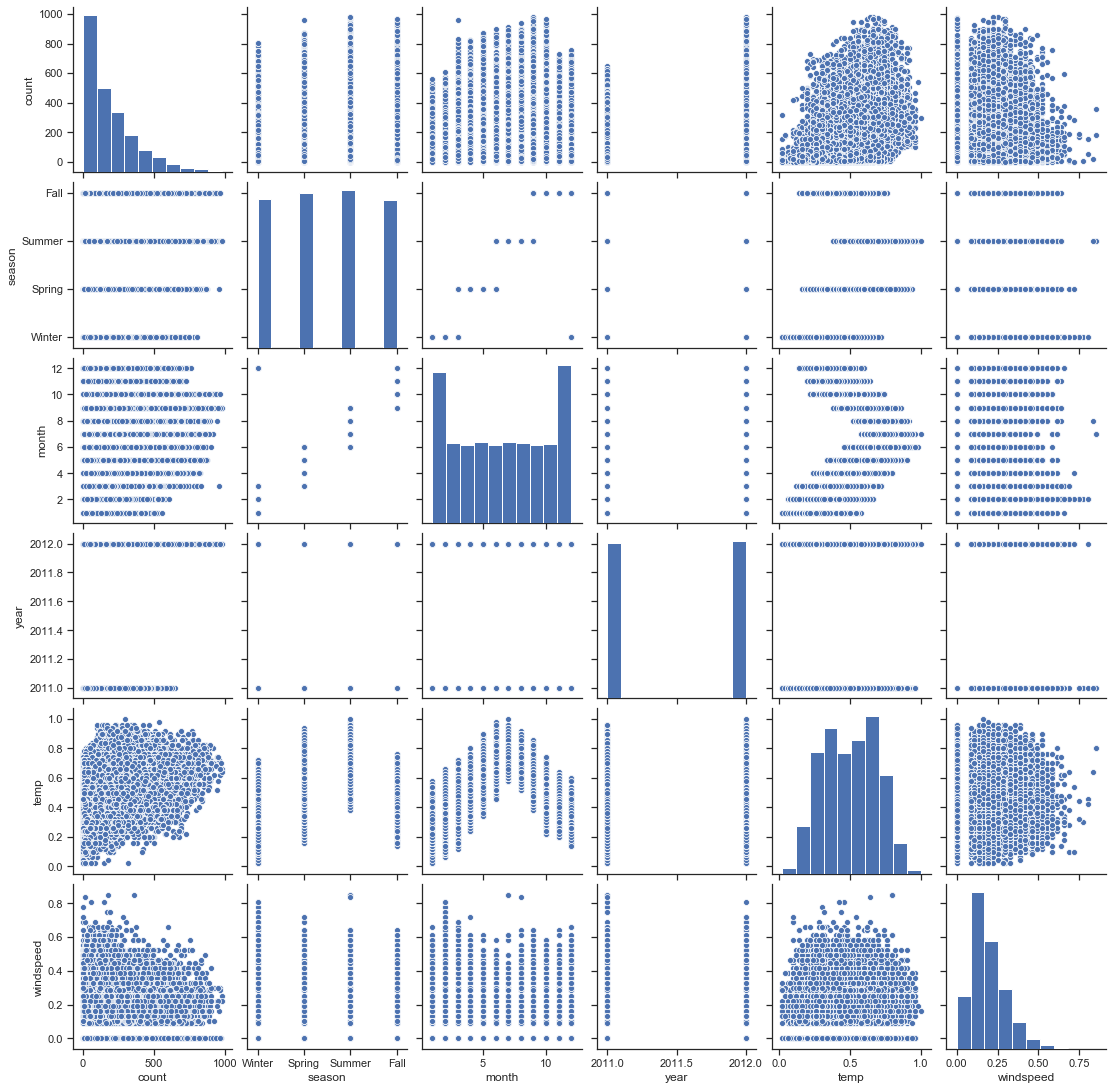

In [19]:
sns.set(style="ticks", color_codes=True)
pair = sns.pairplot(bike, vars = ['count','season', 'month', 'year', 'temp', 'windspeed'])

##### 3.C Pick a Single Predictor
Based on your findings in 3.B, what variable do you think would be most effective as the only feature in a Simple Linear Regression. Explain your reasoning.

- There seems to be a positive correlation between both temperature and usage and adjusted temperature to usage for most of the temperature range. This should intuitively make sense, as people are not likely to be outside in cold weather. For the maximum temperatures, which seem to be a small subset of the data, there was shown to be a dip in this curve. This would also make sense because users may be discouraged to bike when its too hot outside. Climate in DC has been shown to be notoriously humid, which would explain the negative correlation between the humidity and the usage rate.

Text(0, 0.5, 'Count of all Biks Rented')

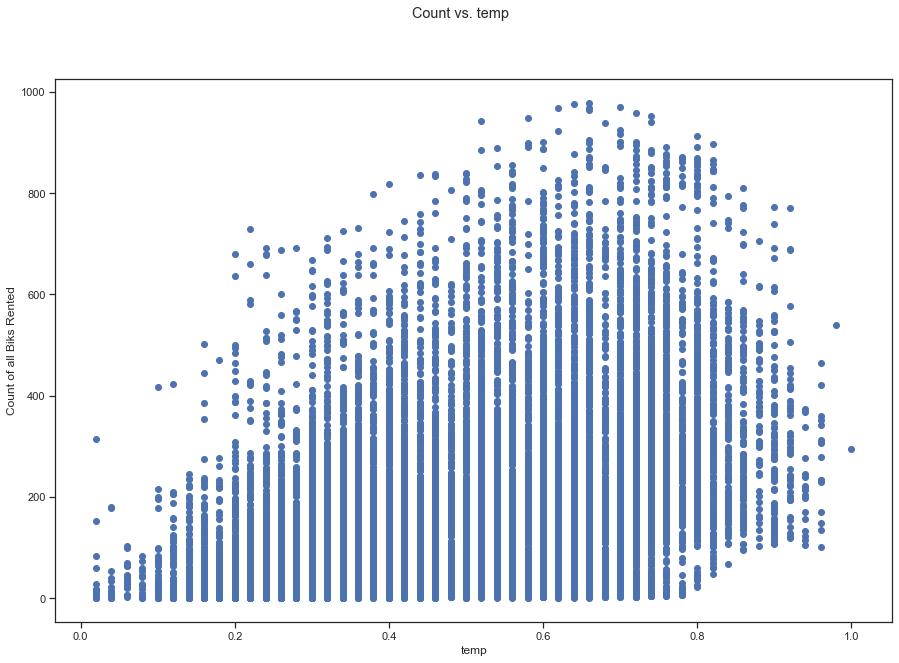

In [265]:
plt.scatter(bike['temp'], bike['count'])
plt.suptitle('Count vs. temp')
plt.xlabel('temp')
plt.ylabel('Count of all Bikes Rented')

### Simple Linear Regression

#### 1. Build a function that takes in two lists, Y and X, and returns the intercept and slope coefficients that minimize SSE/RSS. 

In [ ]:
#I initially had a function in this part, but at 2am this morning it broke and I just counldn't fix it. So, I reverted back to original coding. My apologies. 

In [220]:
Y = bike['temp'].values.reshape(-1, 1)
X = bike['count'].values.reshape(-1, 1)

In [221]:
# Create the regressor: reg
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [222]:
# Create the prediction space
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

In [223]:
# Fit the model to the data
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [224]:
# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

In [225]:
# Print R^2 
print(reg.score(X, Y))

0.1636097545399916


In [227]:
#adding a prediction 
bike['Mean_Yhat'] = bike['registered'].mean()
bike.head(1)

,hour,date,holiday,weathersit,temp,hum,windspeed,count,season,registered,casual,weekday,month,day_name,year,month_year,Mean_Yhat
0,0.0,2011-01-01,0,1,0.24,0.81,0.0,16,Winter,13,3,5,1,Saturday,2011,2011-01,153.969459


In [228]:
#calculate SSE/RSS / residual sum of squares / also known as a loss function 
rss = np.sum(np.square(bike['temp'] - bike['Mean_Yhat']))
rss

408752571.49406236

#### 2. Use your function above to find the optimal slope and intercept between our Y value and the predictor you chose in 3.C above. Interpret the slope in real-world meaning.

In [35]:
from sklearn import linear_model

In [229]:
model = linear_model.LinearRegression()

In [279]:
X_1 = bike['temp']
Y_1 = bike['count']

In [231]:
def inter_slope(x_val, y_val):
    x = np.array(x_val)
    y = np.array(y_val)
    m = ((np.mean(x) * np.mean(y)) - np.mean(x*y)) / ((np.mean(x) * np.mean(x)) - np.mean(x*x))
    m = round(m,2)
    b = (np.mean(y) - np.mean(x)*m)
    b= round(b, 2)
    
    return m, b

In [281]:
inter_slope(X_1, Y_1)

(380.91, 0.34)

In [233]:
print(f'The slope is: {reg.coef_}')
print(f'The intercept is {reg.intercept_}')

The slope is: [[0.00042952]]
The intercept is [0.41564295]


#Interpret the slope in real-world meaning.

#Slope = regression line / consistent change / relationship between two variables in a linear model 

#The slope equals the change in temperature for each unit change in count. 

#### 3. Build a function that takes in a list of predictions and a corresponding list of observed values and then prints the following metrics: mean squared error, root mean squared error, R^2.

In [237]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [301]:
features = ['registered', 'casual']
X_2 = bike[features]
y_2 = bike['count']

In [302]:
lm = linear_model.LinearRegression()
lm.fit(X_2, y_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [303]:
predictions = lm.predict(X_2)
print(predictions)

[16. 40. 32. ... 90. 61. 49.]


In [305]:
#residuals - diffrences between 
residuals = y_2 - predictions
residuals

0       -5.329071e-14
1       -4.973799e-14
2       -4.263256e-14
3       -5.329071e-14
4       -5.639933e-14
             ...     
17349   -1.421085e-14
17350   -2.842171e-14
17351   -2.842171e-14
17352   -4.263256e-14
17353   -4.263256e-14
Name: count, Length: 17354, dtype: float64

In [306]:
residuals.mean()

-7.984585295194861e-15

In [307]:
#calculate the SSE/RSS

rss = (residuals ** 2).sum()
rss

6.053902100364502e-23

**MSE**

In [308]:
def MSE(predict, y_2):
    return ((predictions, y_2)**2).mean()

In [309]:
#Calculate the MSE /this is a risk function, correspdoning to the expected value of the squared error loss 
#closer to 0 the better

#by hand
MSE = (rss / len(residuals))
print(rss / len(residuals))

3.4884764897801675e-27


In [310]:
mean_squared_error(y, predictions)

3.4884764897801675e-27

**RMSE**

In [311]:
def RMSE(predict, target):
    return np.sqrt(((predictions - y_2)**2).mean())

In [312]:
#calculate the RMSE / as close to 0 as possible 
RMSE = np.sqrt(mean_squared_error(y, predictions))
RMSE

5.906332609818184e-14

**R^2**

In [249]:
#if MAE was calculated

def R2(predict, target):
    return 1 - (MAE(predictions, target) / MAE(target.mean(), target))

In [314]:
#null predicition
null_prediction = y_2.mean()
print(null_prediction)

#null residuals
null_residuals = y_2 - null_prediction 
print(null_residuals)

#Null sum of squares
null_ss = (null_residuals ** 2).sum()
print(null_ss)

R2 = r2_score(y_2, predictions)
print(R2)

189.69419154085514
0       -173.694192
1       -149.694192
2       -157.694192
3       -176.694192
4       -188.694192
            ...    
17349    -70.694192
17350   -100.694192
17351    -99.694192
17352   -128.694192
17353   -140.694192
Name: count, Length: 17354, dtype: float64
571106888.0745072
1.0


In [315]:
print(f'The MSE is {MSE}')
print(f'The RMSE is {RMSE}')
print(f'The R2 Score is {R2}')

The MSE is 3.4884764897801675e-27
The RMSE is 5.906332609818184e-14
The R2 Score is 1.0


In [317]:
#Plot my regression line 
#sns.lmplot(x='count', y='temp', data=bike)
#plt.plot(prediction_space, y_pred, color='black', linewidth=3)


#### 4. Use the values you found in Problem 2 to calculate predictions for all values of X in your dataset. Then use the function from Problem 3 to report your evaluation metrics.

In [252]:
import statsmodels.api as sm

In [318]:
predictions = lm.predict(X_2)
print(predictions)

[16. 40. 32. ... 90. 61. 49.]


In [319]:
print(f'The MSE is {MSE}')
print(f'The RMSE is {RMSE}')
print(f'The R2 Score is {R2}')

The MSE is 3.4884764897801675e-27
The RMSE is 5.906332609818184e-14
The R2 Score is 1.0


### Multiple Linear Regression

#### 1. Set values of X and y, now using multiple features to build X.

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [320]:
features = ['windspeed', 'month', 'registered']

X_3 = bike[features]
y_3 = bike['count']

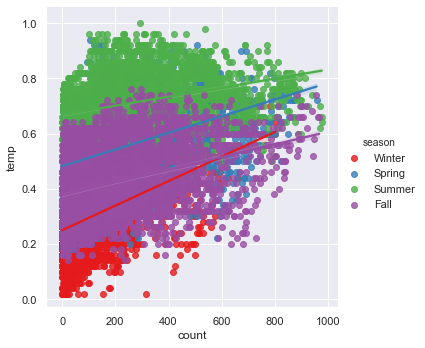

In [298]:
# Plot a linear regression between 'count' and 'temp', with a hue of 'season' and palette of 'Set1'
sns.lmplot(x='count', y='temp', data=bike, hue='season', palette='Set1');

#### 2. Split  your data into train and test data. 

In [321]:
# Create training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size = 0.3, random_state=42)

In [322]:
# Create the regressor: reg_all
reg_all = LinearRegression()

#### 3. Use sklearn to fit a linear regression model between your X and y

In [323]:
# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [324]:
# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

#### 4. Use your function from the previous section to evaluate your model for both your training and testing data. What does the difference between these values tell you about your model? (Hint: Consider the bias-variance tradeoff)

In [325]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9469543255001461
Root Mean Squared Error: 41.68082274875796


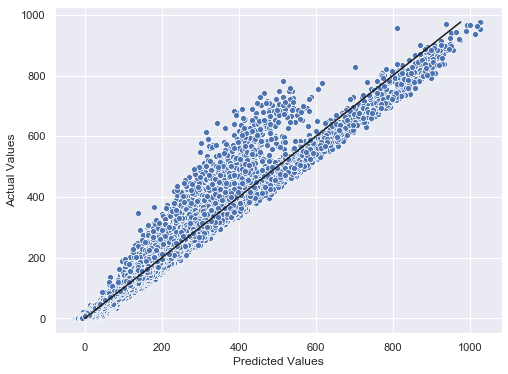

In [326]:
X = bike[['weathersit','temp', 'registered']].values
X = sm.add_constant(X)
#y already set

# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y, X) #ordinary
model = model.fit()
predictions = model.predict(X)

# Plot the model
plt.figure(figsize=(8,6))
sns.scatterplot(predictions, y)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k')

plt.show()


In [327]:
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
mse

1737.2909850133792

#### 5. Based on your MLR model from above, choose two X features and interpret their real-world meaning. If you used a dummy variable, please make that one of your options.

A somewhat similar trend can also be observed in the month vs usage plot, with an evidently higher usage rate during the warmer months of the summer and the lowest usage during January. With some manipulation similar to my previous plots, this data can also used to represent usage based on the temporal distance to the month of January. This correlation, however, is not as strong as that for the manipulated time graph.

Looking at the “Year” variable, it can be seen that the usage rate goes up from Year 1 to Year 2, which could suggest that the system grew in popularity. One important thing to note when using this variable is that, while it may be useful in the scope of making predictions in the year range provided (2011–12), the algorithm would have to extrapolate significantly to predict how it affects future dates (2018 and onward), which could make this variable a less reliable predictor for a different time period.

#### 6. Plot the residual values of your model. Based on your graph and information from your earlier EDA, does your model satisfy the LINEI Assumptions for MLR models? (*Support your answer*)

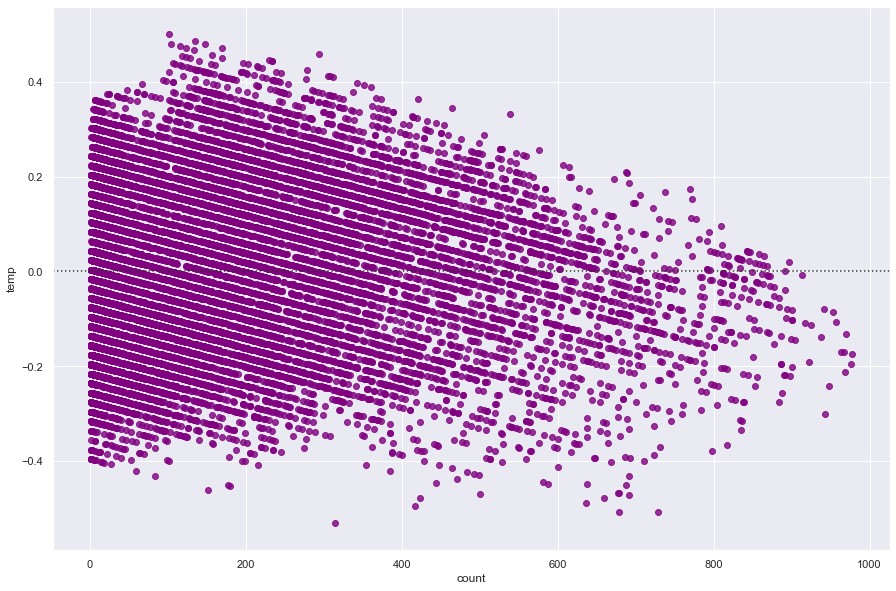

In [330]:
sns.residplot(x='count', y='temp', data=bike, color='purple');

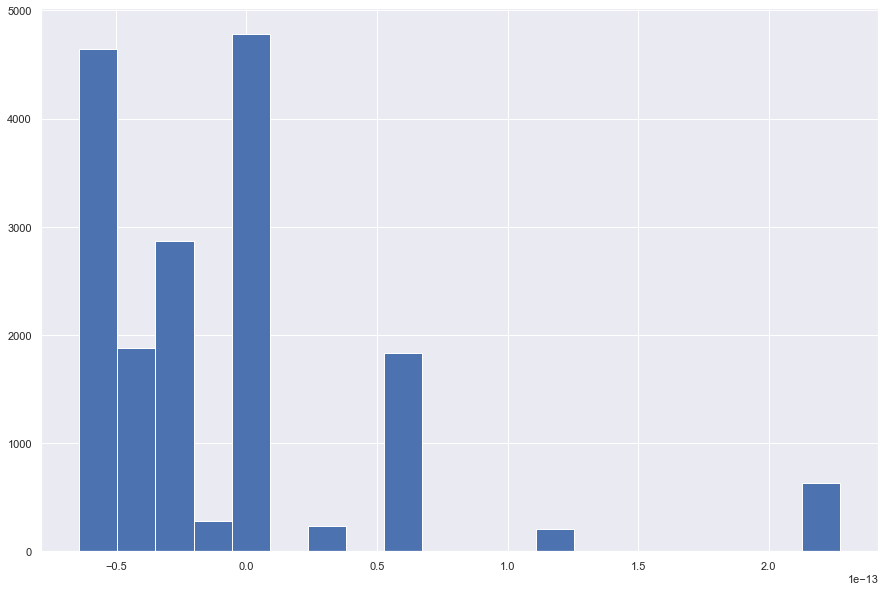

In [331]:
plt.hist(residuals, bins = 20);

- Linearity: The expected value of the dependent variable is a linear function of each independent variable, holding the others fixed
- Independence: The errors (residuals of the fitted model) are independent of each other.
- Homoscedasticity (constant variance): The variance of the errors is constant with respect to the predicting variables or the response.
- Normality: The errors are generated from a Normal distribution (of unknown mean and variance, which can be estimated from the data). Note, this is not a necessary condition to perform linear regression unlike the top three above. However, without this assumption being satisfied, you cannot calculate the so-called ‘confidence’ or ‘prediction’ intervals easily as the well-known analytical expressions corresponding to Gaussian distribution cannot be used.

## Try try again
The best way to make a good model is to try a lot of things! Circle back to your workflow above and try different combinations of variables. In the cell below, explain what other versions of the model you ran and what set of features was the best fit. Why do you think that version was strongest?

'Weathersit' shows that people tends to rent more bikes in clear weather and 'season' shows the fall is the top season to rent bike.

In [122]:
bike.head(1)

,hour,date,holiday,weathersit,temp,windspeed,count,season,registered,casual,weekday,month,day_name,year,month_year,Mean_Yhat
0,0.0,2011-01-01,0,1,0.24,0.0,16,Winter,13,3,5,1,Saturday,2011,2011-01,153.969459


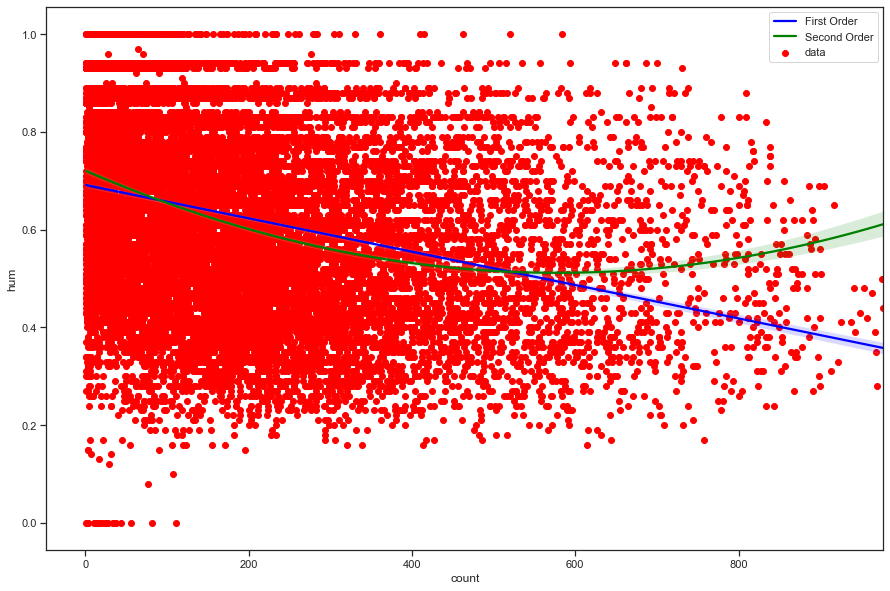

In [129]:
#Regression of varying order - trying something new using the humidity variable 

# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(bike['count'], bike['hum'], label='data', color='red', marker='o')
# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='count', y='hum', data=bike, scatter=None, color='blue', label='First Order')
# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='count', y='hum', data=bike, scatter=None, order=2, color='green', label='Second Order')
# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()